<a href="https://colab.research.google.com/github/SamiraHabib/Coursera_Capstone/blob/main/Coursera_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursera Capstone #

## Modelo de negócio: ##

### Verificar o melhor local onde se encontram o maior número de escolas e o menor número de papelarias. A finalidade seria montar uma papelaria num lugar propício que possa atingir um maior público que utiliza esses serviços. ###

# Importando as bibliotecas #

In [48]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


# Definição das credenciais e version do Foursquare #

In [49]:
CLIENT_ID = '1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA' # your Foursquare ID
CLIENT_SECRET = 'ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA
CLIENT_SECRET:ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D


# Endereço do local escolhido #

In [50]:
#Exemplo - alterar
address = 'Rio de Janeiro, Maracanã'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-22.912161949999998 -43.23117510590559


# Localização #

In [51]:
#Localidade exemplo, mudar
latitude = -22.912161949999998 
longitude = -43.23117510590559

# Define URL #

In [52]:
search_query = 'colégio'
radius = 2000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

colégio .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA&client_secret=ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D&ll=-22.912161949999998,-43.23117510590559&v=20180604&query=colégio&radius=2000&limit=50'

# Envia uma solicitação GET e examina os resultados #

In [53]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '608521e64c8fe812ddf92777'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d13b941735',
      'name': 'School',
      'pluralName': 'Schools',
      'primary': True,
      'shortName': 'School'}],
    'hasPerk': False,
    'id': '4dc1528422713750ba79c2ad',
    'location': {'address': 'R. S. Francisco Xavier, 267',
     'cc': 'BR',
     'city': 'Rio de Janeiro',
     'country': 'Brasil',
     'distance': 660,
     'formattedAddress': ['R. S. Francisco Xavier, 267',
      'Rio de Janeiro, RJ',
      '20550-010',
      'Brasil'],
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.916797220457074,
       'lng': -43.227150214751354}],
     'lat': -22.916797220457074,
     'lng': -43.227150214751354,
     'postalCode': '20550-010',
     'state': 'RJ'},
    'name': 'Colégio Militar do Rio de Janeiro (CMRJ)',
    'referra

## Pegando a parte relevante do JSON e transformando em um dataframe (pandas) ##

In [54]:
#transformando em dataframe
venues = results['response']['venues']
df_school = json_normalize(venues)
df_school.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,4dc1528422713750ba79c2ad,Colégio Militar do Rio de Janeiro (CMRJ),"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1619337702,False,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,20550-010,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",NaN
1,4dbfe92c4b2221ec2d640bac,Colégio Batista,[],v-1619337702,False,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",Maracanã
2,512b53c1e4b0fd3b1159b204,Colégio Ressurreição,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1619337702,False,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",NaN
3,5071a03ce4b0e1b65ea15489,Colégio Pedro II,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1619337702,False,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,20550-012,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",Campus Tijuca II
4,4e70d2a431511ff44b9f3e70,Colégio Pinheiro Guimarães,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1619337702,False,"Rua Almirante Cóchrane, Tijuca",-22.921115,-43.229234,"[{'label': 'display', 'lat': -22.9211150980463...",1016,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Almirante Cóchrane, Tijuca, Rio de Janeir...",NaN


# Define a informação de interesse e filtra o dataframe #

In [55]:
# Mantém somente as colunas que incluem venue name e qualquer coisa que é associada com a localização
filtered_columns = ['name', 'categories'] + [col for col in df_school.columns if col.startswith('location.')] + ['id']
df_school_filtered = df_school.loc[:, filtered_columns]

# função que extrai a categoria de venue 
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filtra a categoria por cada linha do data frame
df_school_filtered['categories'] = df_school_filtered.apply(get_category_type, axis=1)

# limpa os nomes das colunas para manter somente o último termo
df_school_filtered.columns = [column.split('.')[-1] for column in df_school_filtered.columns]

df_school_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Colégio Militar do Rio de Janeiro (CMRJ),School,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,20550-010,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",NaN,4dc1528422713750ba79c2ad
1,Colégio Batista,None,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",Maracanã,4dbfe92c4b2221ec2d640bac
2,Colégio Ressurreição,School,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",NaN,512b53c1e4b0fd3b1159b204
3,Colégio Pedro II,School,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,20550-012,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",Campus Tijuca II,5071a03ce4b0e1b65ea15489
4,Colégio Pinheiro Guimarães,School,"Rua Almirante Cóchrane, Tijuca",-22.921115,-43.229234,"[{'label': 'display', 'lat': -22.9211150980463...",1016,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Almirante Cóchrane, Tijuca, Rio de Janeir...",NaN,4e70d2a431511ff44b9f3e70


# Avaliação dos dados: #

In [56]:
df_school_filtered.dtypes

name                 object
categories           object
address              object
lat                 float64
lng                 float64
labeledLatLngs       object
distance              int64
postalCode           object
cc                   object
city                 object
state                object
country              object
formattedAddress     object
crossStreet          object
id                   object
dtype: object

In [57]:
df_school_filtered.describe()

,lat,lng,distance
count,50.000000,50.000000,50.00000
mean,-22.917376,-43.231280,1202.06000
std,0.006104,0.009265,482.21853
min,-22.931675,-43.248110,221.00000
25%,-22.921262,-43.240111,807.50000
50%,-22.916570,-43.231191,1236.50000
75%,-22.914210,-43.223809,1598.75000
max,-22.899421,-43.214707,2213.00000


In [58]:
df_school_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Colégio Militar do Rio de Janeiro (CMRJ),School,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,20550-010,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",NaN,4dc1528422713750ba79c2ad
1,Colégio Batista,None,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",Maracanã,4dbfe92c4b2221ec2d640bac
2,Colégio Ressurreição,School,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",NaN,512b53c1e4b0fd3b1159b204
3,Colégio Pedro II,School,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,20550-012,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",Campus Tijuca II,5071a03ce4b0e1b65ea15489
4,Colégio Pinheiro Guimarães,School,"Rua Almirante Cóchrane, Tijuca",-22.921115,-43.229234,"[{'label': 'display', 'lat': -22.9211150980463...",1016,NaN,BR,Rio de Janeiro,RJ,Brasil,"[Rua Almirante Cóchrane, Tijuca, Rio de Janeir...",NaN,4e70d2a431511ff44b9f3e70


# Número de nulos das colunas #

In [59]:
print("Number of NaN values for the column city :", df_school_filtered['city'].isnull().sum())
print("Number of NaN values for the column state :", df_school_filtered['state'].isnull().sum())
print("Number of NaN values for the column crossStreet :", df_school_filtered['crossStreet'].isnull().sum())

Number of NaN values for the column city : 14
Number of NaN values for the column state : 14
Number of NaN values for the column crossStreet : 45


In [60]:
df_school_filtered['state'].replace(np.nan,"RJ", inplace=True)

In [61]:
df_school_filtered['city'].replace(np.nan,"Rio de Janeiro", inplace=True)

In [62]:
print("Number of NaN values for the column state :", df_school_filtered['state'].isnull().sum())
print("Number of NaN values for the column city :", df_school_filtered['city'].isnull().sum())

Number of NaN values for the column state : 0
Number of NaN values for the column city : 0


In [63]:
df_school_filtered['categories'].value_counts()

School                             14
High School                        11
Private School                      7
College Classroom                   3
Student Center                      3
College Administrative Building     2
Daycare                             1
Elementary School                   1
College Academic Building           1
General College & University        1
University                          1
Religious School                    1
Church                              1
Community College                   1
Name: categories, dtype: int64

In [64]:
df_school_filtered.isnull().sum()

name                 0
categories           2
address             16
lat                  0
lng                  0
labeledLatLngs       0
distance             0
postalCode          28
cc                   0
city                 0
state                0
country              0
formattedAddress     0
crossStreet         45
id                   0
dtype: int64

# Dropando uma coluna #

In [65]:
df_school_filtered.drop('crossStreet', axis=1, inplace=True)
df_school_filtered.drop('postalCode', axis=1, inplace=True)
df_school_filtered.drop('cc', axis=1, inplace=True)
df_school_filtered.drop('city', axis=1, inplace=True)
df_school_filtered.drop('state', axis=1, inplace=True)
df_school_filtered.drop('country', axis=1, inplace=True)

In [66]:
df_school_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id
0,Colégio Militar do Rio de Janeiro (CMRJ),School,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",4dc1528422713750ba79c2ad
1,Colégio Batista,None,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",4dbfe92c4b2221ec2d640bac
2,Colégio Ressurreição,School,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",512b53c1e4b0fd3b1159b204
3,Colégio Pedro II,School,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",5071a03ce4b0e1b65ea15489
4,Colégio Pinheiro Guimarães,School,"Rua Almirante Cóchrane, Tijuca",-22.921115,-43.229234,"[{'label': 'display', 'lat': -22.9211150980463...",1016,"[Rua Almirante Cóchrane, Tijuca, Rio de Janeir...",4e70d2a431511ff44b9f3e70


In [67]:
df_school_filtered['name'].count()

50

In [68]:
df_school_filtered=df_school_filtered.assign(id_global=1)
print(df_school_filtered)

                                              name  ... id_global
0         Colégio Militar do Rio de Janeiro (CMRJ)  ...         1
1                                  Colégio Batista  ...         1
2                             Colégio Ressurreição  ...         1
3                                 Colégio Pedro II  ...         1
4                       Colégio Pinheiro Guimarães  ...         1
5   Colégio Colégio Nossa Senhora de Lourdes (NSL)  ...         1
6                            Pensi Colégio e Curso  ...         1
7                                       Colégio Qi  ...         1
8                               Colégio e Curso pH  ...         1
9               Colégio Curso Intellectus - Tijuca  ...         1
10                           Pensi Colégio e Curso  ...         1
11         Colégio Carolinna Russo - Sala de vídeo  ...         1
12                           Colégio Curso Martins  ...         1
13                                Colégio Pedro II  ...         1
14        

# Nome e categorias dos dados #

In [69]:
df_school_filtered.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'labeledLatLngs',
       'distance', 'formattedAddress', 'id', 'id_global'],
      dtype='object')

In [70]:
df_school_filtered.categories

0                              School
1                                None
2                              School
3                              School
4                              School
5                      Private School
6                      Private School
7                      Private School
8                         High School
9                         High School
10                     Private School
11                  College Classroom
12                             School
13                        High School
14                             School
15                   Religious School
16                  Community College
17                     Private School
18       General College & University
19                     Student Center
20                        High School
21                        High School
22                        High School
23                        High School
24                             School
25                  College Classroom
26          

In [71]:
df_school_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id,id_global
0,Colégio Militar do Rio de Janeiro (CMRJ),School,"R. S. Francisco Xavier, 267",-22.916797,-43.227150,"[{'label': 'display', 'lat': -22.9167972204570...",660,"[R. S. Francisco Xavier, 267, Rio de Janeiro, ...",4dc1528422713750ba79c2ad,1
1,Colégio Batista,None,"Rua Visconde de Itamarati, 75",-22.916780,-43.231521,"[{'label': 'display', 'lat': -22.9167803740600...",515,"[Rua Visconde de Itamarati, 75 (Maracanã), Rio...",4dbfe92c4b2221ec2d640bac,1
2,Colégio Ressurreição,School,"Rua Oto de Alencar, 23",-22.915196,-43.225821,"[{'label': 'display', 'lat': -22.9151963527452...",644,"[Rua Oto de Alencar, 23, Rio de Janeiro, RJ, B...",512b53c1e4b0fd3b1159b204,1
3,Colégio Pedro II,School,"R. S. Francisco Xavier, 204/208",-22.916347,-43.225898,"[{'label': 'display', 'lat': -22.9163471631107...",714,"[R. S. Francisco Xavier, 204/208 (Campus Tijuc...",5071a03ce4b0e1b65ea15489,1
4,Colégio Pinheiro Guimarães,School,"Rua Almirante Cóchrane, Tijuca",-22.921115,-43.229234,"[{'label': 'display', 'lat': -22.9211150980463...",1016,"[Rua Almirante Cóchrane, Tijuca, Rio de Janeir...",4e70d2a431511ff44b9f3e70,1


# Visualizar escolas no mapa ao redor da localização anteriormente citada #

In [72]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # gerar mapa centrado no entorno do RJ

# Circulo vermelho no centro
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='School',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# Escolas em azul ao entorno
for lat, lng, label in zip(df_school_filtered.lat, df_school_filtered.lng, df_school_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
       # popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Novo dataframe para fazer um merge #

In [73]:
CLIENT_ID = '1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA' # your Foursquare ID
CLIENT_SECRET = 'ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA
CLIENT_SECRET:ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D


In [74]:
#Exemplo - alterar
address = 'Rio de Janeiro, Maracanã'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-22.912161949999998 -43.23117510590559


In [75]:
#Localidade exemplo, mudar
latitude = -22.912161949999998
longitude = -43.23117510590559

In [76]:
search_query = 'papelaria'
radius = 2000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

papelaria .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=1LFBJCCEY1TSE4R1J4Y2MX5PZMPVS4O4IFXTHHCQQMYT53SA&client_secret=ZL54S51I5OLJWENEGTRHCTKLYQ21GIRDXWCLZUMYS24J4J2D&ll=-22.912161949999998,-43.23117510590559&v=20180604&query=papelaria&radius=2000&limit=50'

In [77]:
import requests
negocios = requests.get(url).json()
negocios

{'meta': {'code': 200, 'requestId': '608521e875bcec2ea4718902'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/papergoods_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d121951735',
      'name': 'Paper / Office Supplies Store',
      'pluralName': 'Paper / Office Supplies Stores',
      'primary': True,
      'shortName': 'Office Supplies'}],
    'hasPerk': False,
    'id': '4e946c658b81ef41a94b7377',
    'location': {'address': 'Rua São Francisco Xavier',
     'cc': 'BR',
     'city': 'Rio de Janeiro',
     'country': 'Brasil',
     'distance': 427,
     'formattedAddress': ['Rua São Francisco Xavier',
      'Rio de Janeiro, RJ',
      'Brasil'],
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.91596947304269,
       'lng': -43.23062765107665}],
     'lat': -22.91596947304269,
     'lng': -43.23062765107665,
     'state': 'RJ'},
    'name': 'Papelaria Porto Seguro',
    'referralId': 'v-1619337704'},


In [78]:
#transformando em dataframe
venues = negocios['response']['venues']
df_paper = json_normalize(venues)
df_paper.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode,venuePage.id
0,4e946c658b81ef41a94b7377,Papelaria Porto Seguro,"[{'id': '4bf58dd8d48988d121951735', 'name': 'P...",v-1619337704,False,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,BR,Rio de Janeiro,RJ,Brasil,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",NaN,NaN,NaN
1,4f6258a3e4b0832f00d7d3cd,Papelaria Yunes,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",v-1619337704,False,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,BR,NaN,NaN,Brasil,[Brasil],NaN,NaN,NaN
2,53c547c1498ef1a0284198aa,papelaria raposo,"[{'id': '52f2ab2ebcbc57f1066b8b1e', 'name': 'L...",v-1619337704,False,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,BR,NaN,NaN,Brasil,[Brasil],NaN,NaN,NaN
3,549da21b498e520a4e30b6b6,Papelaria Papel Moderno,"[{'id': '52f2ab2ebcbc57f1066b8b21', 'name': 'S...",v-1619337704,False,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,BR,Rio de Janeiro,RJ,Brasil,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",NaN,NaN,NaN
4,4ea69f80cc219396a47722c6,Papelaria Risco e Rabisco,"[{'id': '4bf58dd8d48988d121951735', 'name': 'P...",v-1619337704,False,"R. Mariz e Barros, 653 A",-22.914617,-43.219935,"[{'label': 'display', 'lat': -22.9146166683652...",1184,BR,Rio de Janeiro,RJ,Brasil,"[R. Mariz e Barros, 653 A, Rio de Janeiro, RJ,...",NaN,NaN,NaN


In [79]:
# Mantém somente as colunas que incluem venue name e qualquer coisa que é associada com a localização
filtered_columns = ['name', 'categories'] + [col for col in df_paper.columns if col.startswith('location.')] + ['id']
df_paper_filtro = df_paper.loc[:, filtered_columns]

# função que extrai a categoria de venue 
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filtra a categoria por cada linha do data frame
df_paper_filtro['categories'] = df_paper_filtro.apply(get_category_type, axis=1)

# limpa os nomes das colunas para manter somente o último termo
df_paper_filtro.columns = [column.split('.')[-1] for column in df_paper_filtro.columns]

df_paper_filtro.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,crossStreet,postalCode,id
0,Papelaria Porto Seguro,Paper / Office Supplies Store,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,BR,Rio de Janeiro,RJ,Brasil,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",NaN,NaN,4e946c658b81ef41a94b7377
1,Papelaria Yunes,Bookstore,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,BR,NaN,NaN,Brasil,[Brasil],NaN,NaN,4f6258a3e4b0832f00d7d3cd
2,papelaria raposo,Locksmith,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,BR,NaN,NaN,Brasil,[Brasil],NaN,NaN,53c547c1498ef1a0284198aa
3,Papelaria Papel Moderno,Stationery Store,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,BR,Rio de Janeiro,RJ,Brasil,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",NaN,NaN,549da21b498e520a4e30b6b6
4,Papelaria Risco e Rabisco,Paper / Office Supplies Store,"R. Mariz e Barros, 653 A",-22.914617,-43.219935,"[{'label': 'display', 'lat': -22.9146166683652...",1184,BR,Rio de Janeiro,RJ,Brasil,"[R. Mariz e Barros, 653 A, Rio de Janeiro, RJ,...",NaN,NaN,4ea69f80cc219396a47722c6


In [80]:
df_paper_filtro.isnull().sum()

name                 0
categories           0
address             13
lat                  0
lng                  0
labeledLatLngs       0
distance             0
cc                   0
city                15
state               15
country              0
formattedAddress     0
crossStreet         30
postalCode          31
id                   0
dtype: int64

# Dropando colunas: #

In [81]:
df_paper_filtro.drop('crossStreet', axis=1, inplace=True)
df_paper_filtro.drop('cc', axis=1, inplace=True)
df_paper_filtro.drop('city', axis=1, inplace=True)
df_paper_filtro.drop('state', axis=1, inplace=True)
df_paper_filtro.drop('country', axis=1, inplace=True)
df_paper_filtro.drop('postalCode', axis=1, inplace=True)

In [82]:
df_paper_filtro.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id
0,Papelaria Porto Seguro,Paper / Office Supplies Store,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",4e946c658b81ef41a94b7377
1,Papelaria Yunes,Bookstore,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,[Brasil],4f6258a3e4b0832f00d7d3cd
2,papelaria raposo,Locksmith,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,[Brasil],53c547c1498ef1a0284198aa
3,Papelaria Papel Moderno,Stationery Store,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",549da21b498e520a4e30b6b6
4,Papelaria Risco e Rabisco,Paper / Office Supplies Store,"R. Mariz e Barros, 653 A",-22.914617,-43.219935,"[{'label': 'display', 'lat': -22.9146166683652...",1184,"[R. Mariz e Barros, 653 A, Rio de Janeiro, RJ,...",4ea69f80cc219396a47722c6


In [83]:
df_paper_filtro=df_paper_filtro.assign(id_global=0)
print(df_paper_filtro)

                                  name  ... id_global
0               Papelaria Porto Seguro  ...         0
1                      Papelaria Yunes  ...         0
2                     papelaria raposo  ...         0
3              Papelaria Papel Moderno  ...         0
4            Papelaria Risco e Rabisco  ...         0
5                       Papelaria Lord  ...         0
6                 Papelaria Saens Pena  ...         0
7              Papelaria Santo Antonio  ...         0
8                       Papelaria Magu  ...         0
9                      Papelaria Gyrus  ...         0
10                      Papelaria Magu  ...         0
11                       Papelaria 375  ...         0
12               Papelaria e Bazar 375  ...         0
13                  Papelaria Alvorada  ...         0
14             Dassis Café e Papelaria  ...         0
15                     Mille Papelaria  ...         0
16                 Papelaria Vila Real  ...         0
17                 Papelaria

In [84]:
df_paper_filtro.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'labeledLatLngs',
       'distance', 'formattedAddress', 'id', 'id_global'],
      dtype='object')

In [85]:
df_paper_filtro.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id,id_global
0,Papelaria Porto Seguro,Paper / Office Supplies Store,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",4e946c658b81ef41a94b7377,0
1,Papelaria Yunes,Bookstore,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,[Brasil],4f6258a3e4b0832f00d7d3cd,0
2,papelaria raposo,Locksmith,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,[Brasil],53c547c1498ef1a0284198aa,0
3,Papelaria Papel Moderno,Stationery Store,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",549da21b498e520a4e30b6b6,0
4,Papelaria Risco e Rabisco,Paper / Office Supplies Store,"R. Mariz e Barros, 653 A",-22.914617,-43.219935,"[{'label': 'display', 'lat': -22.9146166683652...",1184,"[R. Mariz e Barros, 653 A, Rio de Janeiro, RJ,...",4ea69f80cc219396a47722c6,0


# Novo  dataframe (juntando os dataframes) # 

In [86]:
df_new = df_paper_filtro.append(df_school_filtered)

In [87]:
df_new.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,formattedAddress,id,id_global
0,Papelaria Porto Seguro,Paper / Office Supplies Store,Rua São Francisco Xavier,-22.915969,-43.230628,"[{'label': 'display', 'lat': -22.9159694730426...",427,"[Rua São Francisco Xavier, Rio de Janeiro, RJ,...",4e946c658b81ef41a94b7377,0
1,Papelaria Yunes,Bookstore,NaN,-22.912098,-43.236651,"[{'label': 'display', 'lat': -22.9120980467721...",561,[Brasil],4f6258a3e4b0832f00d7d3cd,0
2,papelaria raposo,Locksmith,NaN,-22.919445,-43.234497,"[{'label': 'display', 'lat': -22.9194454163645...",879,[Brasil],53c547c1498ef1a0284198aa,0
3,Papelaria Papel Moderno,Stationery Store,"R. Sto. Afonso, 101",-22.922829,-43.231915,"[{'label': 'display', 'lat': -22.9228290454082...",1189,"[R. Sto. Afonso, 101, Rio de Janeiro, RJ, Brasil]",549da21b498e520a4e30b6b6,0
4,Papelaria Risco e Rabisco,Paper / Office Supplies Store,"R. Mariz e Barros, 653 A",-22.914617,-43.219935,"[{'label': 'display', 'lat': -22.9146166683652...",1184,"[R. Mariz e Barros, 653 A, Rio de Janeiro, RJ,...",4ea69f80cc219396a47722c6,0


In [88]:
df_new.drop('address', axis=1, inplace=True)
df_new.drop('labeledLatLngs', axis=1, inplace=True)
df_new.drop('formattedAddress', axis=1, inplace=True)

In [89]:
df_new.head()

,name,categories,lat,lng,distance,id,id_global
0,Papelaria Porto Seguro,Paper / Office Supplies Store,-22.915969,-43.230628,427,4e946c658b81ef41a94b7377,0
1,Papelaria Yunes,Bookstore,-22.912098,-43.236651,561,4f6258a3e4b0832f00d7d3cd,0
2,papelaria raposo,Locksmith,-22.919445,-43.234497,879,53c547c1498ef1a0284198aa,0
3,Papelaria Papel Moderno,Stationery Store,-22.922829,-43.231915,1189,549da21b498e520a4e30b6b6,0
4,Papelaria Risco e Rabisco,Paper / Office Supplies Store,-22.914617,-43.219935,1184,4ea69f80cc219396a47722c6,0


In [90]:
df_new.tail()

,name,categories,lat,lng,distance,id,id_global
45,Colégio Ícaro.,High School,-22.925388,-43.232258,1476,5204e05a498e64a5b96d47ce,1
46,Colégio Elza Campos,Private School,-22.925436,-43.235918,1555,4e0b72c26284a62b5bc18559,1
47,Colégio JEAI,School,-22.913029,-43.248110,1739,4e70f7c7b99302402c8b1a99,1
48,Colégio Wakigawa,School,-22.917812,-43.245822,1628,4e4c0f70a8097d9c84c3e987,1
49,Colégio Estadual Chico Anysio - CECA,High School,-22.923894,-43.243463,1814,526e589111d2e47da127e143,1


In [91]:
df_new.shape

(87, 7)

# Visualizar as escolas e papelarias na redondeza do centro #

In [92]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # gerar mapa centrado no entorno do RJ

# Circulo vermelho no centro
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='School',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# Escolas em azul ao entorno
for lat, lng, label in zip(df_school_filtered.lat, df_school_filtered.lng, df_school_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# Papelarias em azul ao entorno
for lat, lng, label in zip(df_paper_filtro.lat, df_paper_filtro.lng, df_paper_filtro.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Análise do K-Means

In [93]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [94]:
#Filtrar só lat e long 
df_filt = df_new.loc[:,['lat','lng']]
df_filt.head()

,lat,lng
0,-22.915969,-43.230628
1,-22.912098,-43.236651
2,-22.919445,-43.234497
3,-22.922829,-43.231915
4,-22.914617,-43.219935


In [97]:
#Descobrir o K do K-means (Métricas do cotovelo e silhueta)

k=7
property_clustering = df_filt
kmeans = KMeans(n_clusters = k,random_state=0).fit(property_clustering)
kmeans.labels_
df_filt.insert(0, 'Cluster Labels', kmeans.labels_)


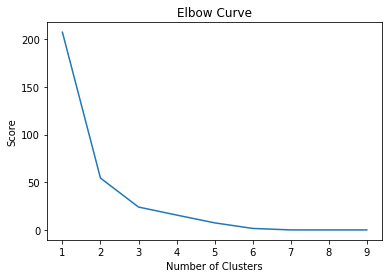

In [98]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_filt[['lat']]
X_axis = df_filt[['lng']]
score = [kmeans[i].fit(property_clustering).inertia_ for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [99]:
from sklearn.metrics import silhouette_score
silh_df = property_clustering
for i in range(2,5):
  kmeans = KMeans(n_clusters=i).fit(silh_df)
  labels_ = kmeans.labels_
  coef = silhouette_score(silh_df,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

N_cluster: 2, score: 0.66350042563816
N_cluster: 3, score: 0.6901751452248134
N_cluster: 4, score: 0.7697318608109353


In [100]:
df_filt

,Cluster Labels,lat,lng
0,3,-22.915969,-43.230628
1,4,-22.912098,-43.236651
2,3,-22.919445,-43.234497
3,2,-22.922829,-43.231915
4,1,-22.914617,-43.219935
...,...,...,...
45,2,-22.925388,-43.232258
46,2,-22.925436,-43.235918
47,4,-22.913029,-43.248110
48,4,-22.917812,-43.245822


### Gráfico dos Clusters

In [101]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[-22.915969, -43.230628], zoom_start=11)
kclusters = 7

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_filt['lat'], df_filt['lng'], df_filt['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Com o cluster onde o k = 5 os pontos se dividiram em cluster melhores, porém ainda tinham pontos outliers que atrapalham a predição certa de colégios vs estabelecimentos (papelarias).
#### Por isso, aumentar o k para 7 e testar para ver o melhor agrupamento dos cluster até que os pontos outliers estivessem isolados. Outra solução seria retirar esses pontos do dataframe original. 

In [102]:
#Rodar o K-means com o K escolhido 

In [103]:
#inserir no dataframe original com os labels identificados no k-means

In [104]:
df_new.insert(0, 'Cluster Labels', kmeans.labels_)

In [105]:
df_new.head()

,Cluster Labels,name,categories,lat,lng,distance,id,id_global
0,2,Papelaria Porto Seguro,Paper / Office Supplies Store,-22.915969,-43.230628,427,4e946c658b81ef41a94b7377,0
1,0,Papelaria Yunes,Bookstore,-22.912098,-43.236651,561,4f6258a3e4b0832f00d7d3cd,0
2,2,papelaria raposo,Locksmith,-22.919445,-43.234497,879,53c547c1498ef1a0284198aa,0
3,3,Papelaria Papel Moderno,Stationery Store,-22.922829,-43.231915,1189,549da21b498e520a4e30b6b6,0
4,1,Papelaria Risco e Rabisco,Paper / Office Supplies Store,-22.914617,-43.219935,1184,4ea69f80cc219396a47722c6,0


In [106]:
#Análise pessoal (Contagem de escola por papelaria)
#df.groupby(['Cluster Labels'])["coluna1"].count()
#coluna id global 

In [107]:
df_new.groupby(["Cluster Labels", "id_global"])["id_global"].count()

Cluster Labels  id_global
0               0             8
                1            15
1               0            15
                1            15
2               0             5
                1            14
3               0             9
                1             6
Name: id_global, dtype: int64